               Fighter1              Fighter2  Winner?          Fight Method  \
0        Brandon Moreno           Amir Albazi        1  Decision - Unanimous   
1      Erin Blanchfield        Rose Namajunas        1  Decision - Unanimous   
2          Caio Machado      Brendson Ribeiro        0      Decision - Split   
3       Ariane da Silva  Jasmine Jasudavicius        0            Submission   
4  Marc-Andre Barriault      Dustin Stoltzfus        0                KO/TKO   

   Time        Time Format       Referee  \
0  5:00  5 Rnd (5-5-5-5-5)  Marc Goddard   
1  5:00  5 Rnd (5-5-5-5-5)   Blake Grice   
2  5:00      3 Rnd (5-5-5)   Jerin Valel   
3  2:28      3 Rnd (5-5-5)   Luke Boutin   
4  4:28      3 Rnd (5-5-5)  Marc Goddard   

                  Finish Details or Judges Scorecard                    Bout  \
0  Eric Colon 46 - 49. Sal D'amato 45 - 50. Derek...          Flyweight Bout   
1  Junichiro Kamijo 47 - 48. Mike Bell 47 - 48. D...  Women's Flyweight Bout   
2  Sal D'amato

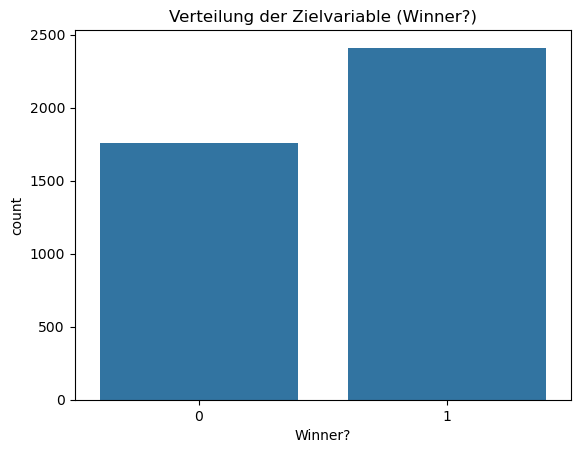

Entfernte komplett leere Spalten: []
Bereinigte Daten gespeichert als fight_totals_cleaned.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Daten laden
df = pd.read_csv("UFC Fight Statistics (July 2016 - Nov 2024).csv")

# 2. Überblick verschaffen
print(df.head())
print(df.info())
print(df.describe(include='all'))

# 3. Fehlende Werte prüfen
print("Fehlende Werte pro Spalte:")
print(df.isnull().sum())

# 4. Zielvariable prüfen (z.B. 'Winner?')
if 'Winner?' in df.columns:
    print(df['Winner?'].value_counts())
    sns.countplot(x='Winner?', data=df)
    plt.title('Verteilung der Zielvariable (Winner?)')
    plt.show()

# 5. Unnötige Spalten entfernen (z.B. leere, ID-Spalten)
empty_cols = [col for col in df.columns if df[col].isnull().all()]
df = df.drop(columns=empty_cols)
print(f"Entfernte komplett leere Spalten: {empty_cols}")

# 6. Datentypen prüfen und ggf. anpassen
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # Falls nicht möglich, bleibt es ein String

# 7. Doppelte Zeilen entfernen
df = df.drop_duplicates()

# 8. Beispiel: Ausreißer erkennen (z.B. bei 'Sig. Str.')
if 'Sig. Str.' in df.columns:
    sns.boxplot(x=df['Sig. Str.'])
    plt.title('Boxplot Significant Strikes')
    plt.show()

# 9. Speichern der bereinigten Daten
df.to_csv("fight_totals_cleaned.csv", index=False)
print("Bereinigte Daten gespeichert als fight_totals_cleaned.csv")